# CNN Model with 10 classes = 1000 pics of dataset of sneaker (Sneaker Recognition ) 

In [4]:
import keras
from math import ceil
import numpy as np
import pandas as pd
from keras.models import Sequential,Model,load_model,model_from_json
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,Input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [7]:
train_datagen = ImageDataGenerator(dtype='float32',
                           rescale=1.0/255.0,
                           horizontal_flip=True,
                           shear_range=0.2,
                           zoom_range=0.2,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           fill_mode='nearest'
                     ,validation_split=0.2)

#ceil(dataset_size / batch_size)
batch_size=32
train_steps = ceil(720/batch_size)
validation_steps = ceil(180/batch_size)


traindata = train_datagen.flow_from_directory('Clean', target_size = (224, 224), batch_size = batch_size, class_mode='categorical', subset='training')
validationdata = train_datagen.flow_from_directory('Clean', target_size = (224, 224), batch_size = batch_size, class_mode = 'categorical',subset='validation')

Found 720 images belonging to 10 classes.
Found 180 images belonging to 10 classes.


In [18]:
modelCNN = Sequential() #Create neural network 
#add layers
#Convolutional1 -> pooling1 -> Convolutional2 -> pooling2 -> Convolutional3 -> pooling3
modelCNN.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))
modelCNN.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelCNN.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelCNN.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))

#add fully connected -> Dense
modelCNN.add(Flatten())
modelCNN.add(Dropout(0.2))
modelCNN.add(Dense(256, activation='relu'))
modelCNN.add(Dense(256, activation='relu'))
modelCNN.add(Dense(10, activation='softmax'))
optimizer=keras.optimizers.adam(lr=0.001)
modelCNN.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(modelCNN.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 56, 56, 128)      

In [19]:
showmodel = modelCNN.fit_generator(traindata,
                                   steps_per_epoch=train_steps,
                                   epochs=50,
                                   validation_data=validationdata,
                                   validation_steps=validation_steps)#eveluate Model

Epoch 1/50
23/23 [==============================] - 144s 6s/step - loss: 2.4268 - accuracy: 0.0736 - val_loss: 2.3015 - val_accuracy: 0.1000
Epoch 2/50
23/23 [==============================] - 141s 6s/step - loss: 2.3015 - accuracy: 0.1028 - val_loss: 2.2886 - val_accuracy: 0.1333
Epoch 3/50
23/23 [==============================] - 139s 6s/step - loss: 2.2937 - accuracy: 0.1833 - val_loss: 2.2895 - val_accuracy: 0.1278
Epoch 4/50
23/23 [==============================] - 139s 6s/step - loss: 2.2729 - accuracy: 0.1639 - val_loss: 2.2512 - val_accuracy: 0.2389
Epoch 5/50
23/23 [==============================] - 140s 6s/step - loss: 2.2087 - accuracy: 0.2139 - val_loss: 2.2938 - val_accuracy: 0.2222
Epoch 6/50
23/23 [==============================] - 139s 6s/step - loss: 2.0569 - accuracy: 0.2667 - val_loss: 2.1242 - val_accuracy: 0.2389
Epoch 7/50
23/23 [==============================] - 140s 6s/step - loss: 2.1184 - accuracy: 0.2375 - val_loss: 2.0305 - val_accuracy: 0.2556
Epoch 8/50
23

In [20]:
train_loss, train_acc = modelCNN.evaluate_generator(generator=traindata,steps=train_steps)
print('\nTrain accuracy:', train_acc,train_loss)


test_loss, test_acc = modelCNN.evaluate_generator(generator=validationdata,steps=validation_steps)
print('\nTest accuracy:', test_acc,test_loss)


Train accuracy: 0.949999988079071 0.2353711873292923

Test accuracy: 0.9388889074325562 0.03483445942401886


In [21]:
#create class 
test_datagen = ImageDataGenerator(rescale=1. / 255)
testdata = test_datagen.flow_from_directory('test/test', target_size = (224, 224),batch_size=32,shuffle=False)
test_steps_per_epoch = ceil(testdata.samples / testdata.batch_size)

predict = modelCNN.predict_generator(testdata,steps=test_steps_per_epoch,verbose=1)
predicted_class=np.argmax(predict,axis=1)

Found 100 images belonging to 10 classes.
4/4 [==============================] - 6s 1s/step


In [22]:
true_class = testdata.classes
class_labels = list(testdata.class_indices.keys())

report = metrics.classification_report(true_class, predicted_class, target_names=class_labels)
print(report)    

print(true_class)    
print(predicted_class)  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        10
           6       0.90      0.90      0.90        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 

In [23]:
#save model & weight & result from 100 testing data into .csv file
filenames=testdata.filenames
print ("",len(filenames))
print ("",len(predicted_class))
results=pd.DataFrame({"Filename":filenames,
                     "Predictions":predicted_class})
results.to_csv("FinalResultCNN.csv",index=False)
with open('Finalmodel_architectureRealCNN.json', 'w') as f:
    f.write(modelCNN.to_json())
modelCNN.save_weights("FinalmodelRealCNN.h5")

 100
 100


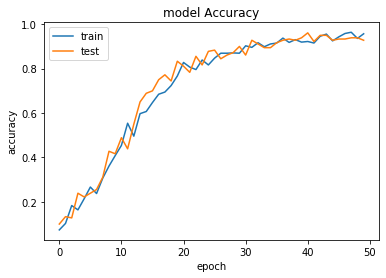

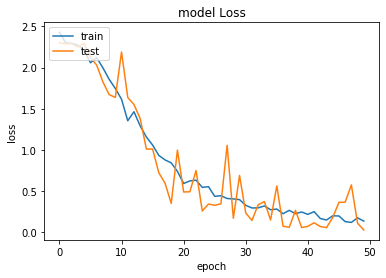

In [24]:
#กราฟแสดงค่าaccuracy
plt.plot(showmodel.history['accuracy'])
plt.plot(showmodel.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#กราฟแสดงค่าloss
plt.plot(showmodel.history['loss'])
plt.plot(showmodel.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()